In [132]:
"""
Created on Tuesday 3 April 2022
Author: ZMW
"""
#import libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from xgboost import plot_importance
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import shap
from sklearn.preprocessing import StandardScaler

In [133]:
#Load the fitted dataset
data = pd.read_csv('data.csv')

In [134]:
data

,Label,Patient,A1_1Deg,A1_1Deg_err,B1_1Deg,B1_1Deg_err,C1_1Deg,C1_1Deg_err,1_Deg_ResSoS_1,1Deg_AdjR2_1,...,8_Deg_ResSoS_1,8Deg_AdjR2_1,A2_8Deg,A2_8Deg_err,B2_8Deg,B2_8Deg_err,C2_8Deg,C2_8Deg_err,8_Deg_ResSoS_2,8Deg_AdjR2_2
0,Not_Parkinson's,PD001,10.388190,0.006132,0.049329,0.000006,0.011989,0.000337,8.928708e+03,0.990598,...,6698.838626,0.951413,10.273125,0.044206,0.386347,0.000384,0.037356,0.002439,6809.444670,0.939095
1,Not_Parkinson's,PD002,10.429055,0.006929,0.049478,0.000007,0.002837,0.000379,1.138859e+04,0.988092,...,4769.907502,0.967360,11.482500,0.049154,0.395412,0.000380,-0.002486,0.002419,8383.481061,0.939586
2,Not_Parkinson's,PD003,9.994177,0.012598,0.049471,0.000014,0.003628,0.000719,3.765340e+04,0.957139,...,3488.748415,0.968709,10.084338,0.019838,0.394595,0.000174,-0.035466,0.001106,1349.962240,0.987259
3,Not_Parkinson's,PD004,10.482881,0.022179,0.049585,0.000023,0.016056,0.001212,1.177490e+05,0.879372,...,10972.046043,0.920137,11.493417,0.048867,0.401386,0.000377,-0.042463,0.002395,8242.145302,0.940370
4,Not_Parkinson's,PD005,9.969252,0.029253,0.049254,0.000032,0.004235,0.001671,2.021019e+05,0.767624,...,18268.976628,0.809586,10.370348,0.036121,0.395392,0.000308,-0.030769,0.001960,4485.285726,0.960035
5,Not_Parkinson's,PD006,10.302529,0.010450,0.049283,0.000011,0.019734,0.000580,2.599454e+04,0.972249,...,7175.782450,0.938474,10.356903,0.067627,0.410282,0.000584,-0.052723,0.003707,16046.923146,0.859535
6,Not_Parkinson's,PD007,9.935464,0.004694,0.049255,0.000005,0.002375,0.000269,5.198786e+03,0.993977,...,1465.027313,0.985896,9.801698,0.024067,0.397850,0.000217,-0.045138,0.001380,1986.965419,0.980134
7,Not_Parkinson's,PD008,9.383829,0.051812,0.048860,0.000061,0.078184,0.003184,6.508306e+05,0.178554,...,15508.432132,0.870504,14.119632,0.451670,0.655363,0.002876,-0.257394,0.018275,724423.072997,-2.407197
8,Not_Parkinson's,PD009,10.221777,0.005149,0.049244,0.000006,0.002274,0.000287,6.253731e+03,0.993152,...,849.603186,0.992275,10.305625,0.022845,0.396998,0.000196,-0.056233,0.001244,1783.111606,0.983816
9,Not_Parkinson's,PD010,10.244784,0.017579,0.050004,0.000019,-0.015054,0.000981,7.360617e+04,0.920684,...,13818.787560,0.878166,10.997959,0.085181,0.406918,0.000690,-0.043189,0.004387,25335.919708,0.802179


In [135]:
columns = ['Label','Patient','A2_1Deg','A2_1Deg_err','B2_1Deg','B2_1Deg_err','C2_1Deg_err','1_Deg_ResSoS_2','1Deg_AdjR2_2',
            'A2_2Deg','A2_2Deg_err','B2_2Deg','B2_2Deg_err','C2_2Deg_err','2_Deg_ResSoS_2','2Deg_AdjR2_2',
            'A2_4Deg','A2_4Deg_err','B2_4Deg','B2_4Deg_err','C2_4Deg_err','4_Deg_ResSoS_2','4Deg_AdjR2_2',
            'A2_6Deg','A2_6Deg_err','B2_6Deg','B2_6Deg_err','C2_6Deg_err','6_Deg_ResSoS_2','6Deg_AdjR2_2',
            'A2_8Deg','A2_8Deg_err','B2_8Deg','B2_8Deg_err','C2_8Deg_err','8_Deg_ResSoS_2','8Deg_AdjR2_2',]

### Add manual calculated gain

In [136]:
OneDegGain = np.array([
                    0.912073222,
                    0.9136153,
                    0.946453363,
                    0.930324124,
                    1.024160204,
                    0.860239838,
                    0.964705222,
                    0.926124391,
                    0.968894501,
                    0.971483673,
                    0.944374367,
                    0.933778991,
                    0.890761283,
                    0.988453628,
                    0.875559126,
                    0.895827128,
                    1.016499658,
                    0.942578402,
                    


                    0.693867928,
                    0.966204026,
                    0.911917526,
                    0.88059683,
                    0.787612966,
                    1.002030367,
                    0.723829141,
                    0.977503904,
                    0.98850198,
                    1.028937991,
                    0.866446545,
                    0.923159411,
                    1.042949957,
                    0.954852019,
                    0.983681259,
                    0.831394353,
                    0.969027024,
                    0.819025317,
                    1.594417873,
                    0.827558755,
                    0.882328238,
                    0.900686808,
                    0.888806663,
                    0.890709987,
                    1.011322545,
                    0.860332024,
                    0.978209757,
                    0.898244125,
                    0.79226521,
                    0.86763214,
                    0.896471445,

                ])

TwoDegGain  = np.array([
                    0.887954823,
                    0.851255832,
                    0.90557114,
                    0.839308532,
                    0.944624518,
                    0.936063494,
                    0.91976169,
                    0.857703025,
                    0.973218178,
                    0.936570807,
                    0.95565309,
                    0.943385867,
                    1.018644673,
                    0.897711899,
                    0.843732835,
                    0.898378885,
                    0.983049632,
                    0.88665677,

                    0.730420733,
                    0.912263537,
                    0.844406181,
                    0.76510247,
                    0.708851801,
                    1.013060953,
                    0.709259156,
                    0.766172025,
                    1.054705839,
                    0.991729167,
                    0.86271223,
                    0.921219896,
                    0.882514199,
                    0.900439093,
                    1.020268699,
                    0.852845557,
                    0.662387044,
                    1.026911899,
                    0.9299805,
                    0.795054975,
                    0.915409616,
                    0.77689629,
                    0.936562782,
                    0.842049578,
                    0.84786327,
                    0.762131388,
                    1.008797904,
                    0.717623686,
                    0.69902342,
                    0.860669706,
                    0.972858133,
])

FourDegGain = np.array([
                    0.842657429,
                    0.927453825,
                    0.860997989,
                    0.82628446,
                    0.907866303,
                    0.886319853,
                    0.879363614,
                    0.945246227,
                    0.865730996,
                    0.949044696,
                    0.927054434,
                    0.907460104,
                    0.768451296,
                    0.824017605,
                    0.811562703,
                    0.864465361,
                    1.018469625,
                    0.835846561,


                    0.701047864,
                    0.889725099,
                    0.860892919,
                    0.842337432,
                    0.603231184,
                    1.11633862,
                    0.837634157,
                    0.872113846,
                    1.006655281,
                    0.867235325,
                    0.864534497,
                    0.911235509,
                    0.863969644,
                    0.810695263,
                    0.871698328,
                    0.665919935,
                    0.531701684,
                    0.804825843,
                    0.849537458,
                    0.843883704,
                    0.69678833,
                    0.783769251,
                    0.87821069,
                    0.712485419,
                    0.82906287,
                    0.792533492,
                    0.96919708,
                    0.564497325,
                    0.566934463,
                    0.745104906,
                    0.955859208



])

SixDegGain = np.array([
                    0.795081992,
                    0.810824946,
                    0.776092811,
                    0.667632973,
                    0.87556368,
                    0.832291613,
                    0.896167466,
                    0.838934215,
                    0.919519996,
                    0.931875303,
                    0.881653294,
                    0.866711107,
                    0.950478365,
                    0.837782552,
                    0.790184316,
                    0.773900113,
                    1.07422539,
                    0.838624874,


                    0.65456717,
                    0.895222489,
                    0.854136383,
                    0.724005492,
                    0.559365857,
                    1.045320355,
                    0.742815067,
                    0.717658563,
                    0.988182766,
                    0.892810205,
                    0.802579385,
                    0.872242689,
                    0.708138512,
                    0.875686044,
                    0.857818638,
                    0.621973743,
                    0.682965128,
                    0.745383783,
                    0.90491956,
                    0.973499277,
                    0.79022132,
                    0.797564375,
                    0.968962788,
                    0.639960352,
                    0.793820437,
                    0.674619969,
                    0.921646985,
                    0.508275304,
                    0.454613572,
                    0.761053356,
                    0.856514396,
                    
                    
])

EightDegGain = np.array([
                    0.986636423,
                    0.745501748,
                    0.7579907,
                    0.909797906,
                    0.78105301,
                    0.858659788,
                    0.85951671,
                    0.885411917,
                    0.828367438,
                    0.911980105,
                    0.863014297,
                    0.863014297,
                    0.708399551,
                    0.857059114,
                    0.789595449,
                    0.894818095,
                    1.062361214,
                    0.811056814,

                    0.768461692,
                    0.889365304,
                    0.732299908,
                    0.80410417,
                    0.614253632,
                    1.086722755,
                    0.768287138,
                    0.624113864,
                    0.874898474,
                    0.777961479,
                    0.877308815,
                    0.799197517,
                    0.730673411,
                    0.840238835,
                    0.743815855,
                    0.634293751,
                    0.529398709,
                    0.750469831,
                    0.74858958,
                    0.881237282,
                    0.750773553,
                    0.789284873,
                    0.972603229,
                    0.684932294,
                    0.795542508,
                    0.653688664,
                    0.909587046,
                    0.570216915,
                    0.470689666,
                    0.816745486,
                    0.796820748
])

In [137]:
# Create dataframe for gain to append in the main features
gain = pd.DataFrame({
                     'OneDegGain':OneDegGain, 'TwoDegGain':TwoDegGain,'FourDegGain':FourDegGain,
                     'SixDegGain':SixDegGain,'EightDegGain':EightDegGain
})

In [138]:
# Concat with gain
data = pd.concat([data,gain],axis=1) # drop patient and Label column

In [139]:
data_gain = data.iloc[:,2:] # drop patient and Label column

In [140]:
#Check NaN
data_gain.isnull().values.any()

True

In [141]:
# Filling nan with mean values 
for col in data_gain:
    data_gain[col].fillna(data_gain[col].mean(),inplace=True)

In [142]:
# Check the size
data_gain.shape

(49, 85)

In [143]:
# Features and labels
x = data_gain.iloc[:,2:]
y = data.iloc[:,0]

In [144]:
## Convert the categorical variables to number
LabelEncoder_gender = LabelEncoder()
y = LabelEncoder_gender.fit_transform(y)

In [145]:
x

,B1_1Deg,B1_1Deg_err,C1_1Deg,C1_1Deg_err,1_Deg_ResSoS_1,1Deg_AdjR2_1,A2_1Deg,A2_1Deg_err,B2_1Deg,B2_1Deg_err,...,B2_8Deg_err,C2_8Deg,C2_8Deg_err,8_Deg_ResSoS_2,8Deg_AdjR2_2,OneDegGain,TwoDegGain,FourDegGain,SixDegGain,EightDegGain
0,0.049329,0.000006,0.011989,0.000337,8.928708e+03,0.990598,10.379248,0.005542,0.049466,0.000006,...,0.000384,0.037356,0.002439,6809.444670,0.939095,0.912073,0.887955,0.842657,0.795082,0.986636
1,0.049478,0.000007,0.002837,0.000379,1.138859e+04,0.988092,10.122742,0.010316,0.049389,0.000011,...,0.000380,-0.002486,0.002419,8383.481061,0.939586,0.913615,0.851256,0.927454,0.810825,0.745502
2,0.049471,0.000014,0.003628,0.000719,3.765340e+04,0.957139,10.166580,0.003682,0.049289,0.000004,...,0.000174,-0.035466,0.001106,1349.962240,0.987259,0.946453,0.905571,0.860998,0.776093,0.757991
3,0.049585,0.000023,0.016056,0.001212,1.177490e+05,0.879372,10.409739,0.024852,0.049414,0.000026,...,0.000377,-0.042463,0.002395,8242.145302,0.940370,0.930324,0.839309,0.826284,0.667633,0.909798
4,0.049254,0.000032,0.004235,0.001671,2.021019e+05,0.767624,10.068857,0.011587,0.049517,0.000013,...,0.000308,-0.030769,0.001960,4485.285726,0.960035,1.024160,0.944625,0.907866,0.875564,0.781053
5,0.049283,0.000011,0.019734,0.000580,2.599454e+04,0.972249,10.361953,0.012120,0.049493,0.000013,...,0.000584,-0.052723,0.003707,16046.923146,0.859535,0.860240,0.936063,0.886320,0.832292,0.858660
6,0.049255,0.000005,0.002375,0.000269,5.198786e+03,0.993977,9.921300,0.005766,0.049196,0.000006,...,0.000217,-0.045138,0.001380,1986.965419,0.980134,0.964705,0.919762,0.879364,0.896167,0.859517
7,0.048860,0.000061,0.078184,0.003184,6.508306e+05,0.178554,9.409925,0.045166,0.049135,0.000053,...,0.002876,-0.257394,0.018275,724423.072997,-2.407197,0.926124,0.857703,0.945246,0.838934,0.885412
8,0.049244,0.000006,0.002274,0.000287,6.253731e+03,0.993152,9.979753,0.008817,0.049010,0.000010,...,0.000196,-0.056233,0.001244,1783.111606,0.983816,0.968895,0.973218,0.865731,0.919520,0.828367
9,0.050004,0.000019,-0.015054,0.000981,7.360617e+04,0.920684,10.590790,0.016854,0.049646,0.000018,...,0.000690,-0.043189,0.004387,25335.919708,0.802179,0.971484,0.936571,0.949045,0.931875,0.911980


In [146]:
# sc_x = StandardScaler()
# for col in x.columns:
#     x[col] = sc_x.fit_transform(x[col])

In [147]:
# # Features and labels
# x = data_second.iloc[:,2:].values
# y = data_second.iloc[:,0].values

In [148]:
# spliting feature
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

### Model

In [149]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Set up StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate the average accuracy
cv_scores = cross_val_score(model, x, y, cv=cv, scoring="accuracy")
mean_accuracy = np.mean(cv_scores)

print(f"Mean cross-validation accuracy: {mean_accuracy:.2f}")

Mean cross-validation accuracy: 0.58


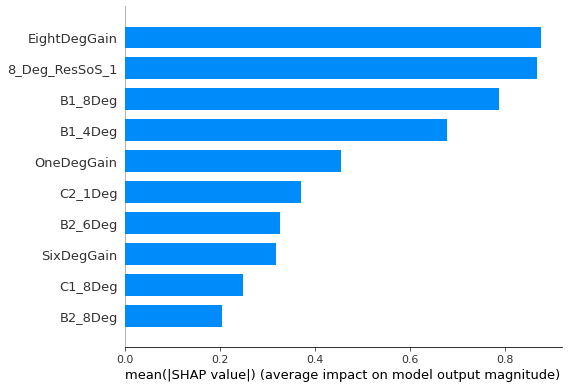

In [152]:
import numpy as np
import xgboost as xgb
import shap

# Create an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Train the model on your data
model.fit(x, y)

# Create a SHAP explainer object
explainer = shap.Explainer(model, x)

# Calculate the SHAP values for all the features
shap_values = explainer(x)


# Create a summary plot of the SHAP values
shap.summary_plot(shap_values, x, max_display=10, plot_type='bar',show=False)

# Save the figure
plt.savefig('shap_summary_manual.png', bbox_inches='tight', dpi=300)

### Shap

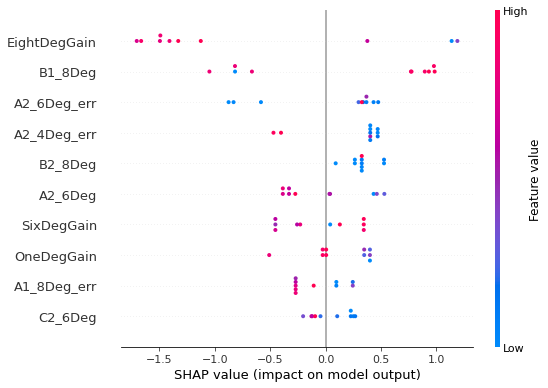

In [111]:
# Create an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(x_train, y_train)

# Get feature names from the DataFrame
feature_names = x.columns.tolist()

# Initialize the SHAP explainer with the trained model
explainer = shap.Explainer(model)

# Compute SHAP values for the test dataset
shap_values = explainer(x_test)

# Plot summary of feature importances
shap.summary_plot(shap_values, x_test, feature_names=feature_names,max_display=10,show=False)


# Save the plot as an image file
#plt.savefig('shap_summary_plot3.png', bbox_inches='tight', dpi=300)

### Feature selection

In [49]:
data = data[['Label','Patient','EightDegGain','C2_1Deg','A1_8Deg_err','B1_8Deg','B2_8Deg',
             'A2_6Deg','8_Deg_ResSoS_1','A2_1Deg','TwoDegGain','B1_4Deg'
            ]]

In [50]:
# Features and labels
x = data.iloc[:,2:]
y = data.iloc[:,0]

## Convert the categorical variables to number
LabelEncoder_gender = LabelEncoder()
y = LabelEncoder_gender.fit_transform(y)

# spliting feature
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [51]:
# Create an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Set up StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate the average accuracy
cv_scores = cross_val_score(model, x, y, cv=cv, scoring="accuracy")
mean_accuracy = np.mean(cv_scores)

print(f"Mean cross-validation accuracy: {mean_accuracy:.2f}")

Mean cross-validation accuracy: 0.59


### Hyperparameter Tuning

In [52]:
params = {'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
          'gamma': hp.uniform('gamma', 0, 0.2),
          'min_child_weight': hp.choice('min_child_weight', range(1, 6)),
          'subsample': hp.uniform('subsample', 0.7, 1.0),
          'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1.0),
          'max_depth': hp.choice('max_depth', range(3, 10)),
          'n_estimators': hp.choice('n_estimators', [50, 100, 200, 300, 400, 500, 1000])}
    
min_child_weight_ls = range(1, 6)
max_depth_ls = range(3, 10)
n_estimators_ls = [100, 200, 300, 400, 500, 1000, 1500, 2000]

In [53]:
def hyperparameter_tuning(params):
    clf=xgb.XGBClassifier(**params, n_jobs=6, random_state=1, seed=1,
                              use_label_encoder=False)
    clf.fit(x_train, y_train,eval_metric='auc')
    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred>0.5)
#     print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [54]:
trials = Trials()

best_hyperparams = fmin(fn = hyperparameter_tuning,
                        space = params,
                        algo = tpe.suggest,
                        max_evals = 50,
                        trials = trials)

100%|██████████| 50/50 [00:07<00:00,  6.29trial/s, best loss: -0.7333333333333333]


In [48]:
best_hyperparams

{'colsample_bytree': 0.9576281049090212,
 'gamma': 0.19282955846208527,
 'learning_rate': 0.01936066633867328,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 6,
 'subsample': 0.8050237913934419}

In [49]:
best_model = xgb.XGBClassifier(n_estimators=n_estimators_ls[best_hyperparams['n_estimators']],
                               max_depth=max_depth_ls[best_hyperparams['max_depth']],
                               min_child_weight=min_child_weight_ls[best_hyperparams['min_child_weight']],
                               learning_rate=best_hyperparams['learning_rate'],
                               gamma=best_hyperparams['gamma'],
                               subsample=best_hyperparams['subsample'],
                               colsample_bytree=best_hyperparams['colsample_bytree'],
                               n_jobs=6, random_state=1, seed=1)
    

In [50]:
def run_best_model(arg):
    # data set preparation
    # data = pd.read_csv('data.csv')
    data = arg

    ## Convert the categorical variables to number
    LabelEncoder_gender = LabelEncoder()
    data['Label'] = LabelEncoder_gender.fit_transform(data['Label'])
    
    # run 30 repetitions
    splits = 30
    all_set = []
    for split in range(1,splits+1):
        
        seed = split

        # data set preparation
        train , test = train_test_split(data,train_size = 0.7,shuffle=True,random_state=seed)
        #validate , test = train_test_split(rest, train_size = 0.5, shuffle=True)

        # training set
        data_tra_x = train.iloc[:,2:].values
        data_tra_y = train.iloc[:,0].values


        # validation set
        # data_val_x = validate.iloc[:,2:].values
        # data_val_y = validate.iloc[:,0].values


        # test set
        data_tes_x = test.iloc[:,2:].values
        data_tes_y =  test.iloc[:,0].values

        best_model = xgb.XGBClassifier(n_estimators=n_estimators_ls[best_hyperparams['n_estimators']],
                               max_depth=max_depth_ls[best_hyperparams['max_depth']],
                               min_child_weight=min_child_weight_ls[best_hyperparams['min_child_weight']],
                               learning_rate=best_hyperparams['learning_rate'],
                               gamma=best_hyperparams['gamma'],
                               subsample=best_hyperparams['subsample'],
                               colsample_bytree=best_hyperparams['colsample_bytree'],
                               n_jobs=6, random_state=1, seed=1,use_label_encoder=False)
    
        best_model.fit(data_tra_x,data_tra_y,eval_metric='auc')

        # training error
        tra_pred = best_model.predict_proba(data_tra_x)
        tra_results = [split,'tra',roc_auc_score(data_tra_y,tra_pred[:,1])]
      

        # validation error
        # val_pred = best_model.predict_proba(data_val_x)
        # val_results = [split,'val',roc_auc_score(data_val_y,val_pred[:,1])]
        

        # testing error
        tes_pred = best_model.predict_proba(data_tes_x)
        tes_results = [' ','tes',roc_auc_score(data_tes_y,tes_pred[:,1])]
    

        all_set += tra_results,tes_results

    all_set_df = pd.DataFrame(all_set,columns=['split','set','acc'])

    print('train accuracy',all_set_df[all_set_df['set'] == 'tra']['acc'].mean(),'std',all_set_df[all_set_df['set'] == 'tra']['acc'].std())
    #print('validation accuracy',all_set_df[all_set_df['set'] == 'val']['acc'].mean(),'std',all_set_df[all_set_df['set'] == 'tra']['acc'].std())
    print('test accuracy',all_set_df[all_set_df['set'] == 'tes']['acc'].mean(),'std',all_set_df[all_set_df['set'] == 'tes']['acc'].std())

#run_best_model(data)

In [17]:
run_best_model(data)

train accuracy 0.891590015840588 std 0.08669227319723478
test accuracy 0.5072993827160494 std 0.14120736888705598


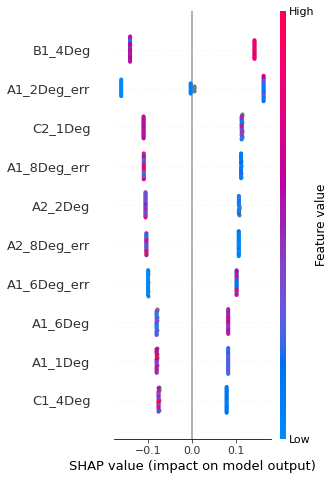

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib
classifier = xgb.XGBClassifier()
best_model.fit(x_train,y_train)
shap_values = shap.TreeExplainer(best_model).shap_values(x)
f = plt.figure()
shap.summary_plot(shap_values, x,max_display=10,show=False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 7)
#plt.savefig("summary_plot_with_.png", bbox_inches='tight', dpi=600)

plt.tight_layout()
plt.savefig("shap_Gain_graph.png", format="png", dpi=300)
plt.show()

In [63]:
from sklearn.model_selection import ShuffleSplit

In [18]:
from sklearn.model_selection import cross_val_score, KFold
best_model = xgb.XGBClassifier(n_estimators=n_estimators_ls[best_hyperparams['n_estimators']],
                               max_depth=max_depth_ls[best_hyperparams['max_depth']],
                               min_child_weight=min_child_weight_ls[best_hyperparams['min_child_weight']],
                               learning_rate=best_hyperparams['learning_rate'],
                               gamma=best_hyperparams['gamma'],
                               subsample=best_hyperparams['subsample'],
                               colsample_bytree=best_hyperparams['colsample_bytree'],
                               n_jobs=6, random_state=1, seed=1,use_label_encoder=False)
# data = data[['Label','Patient','C2_6Deg','B2_4Deg','B2_6Deg','C2_4Deg',
#             'C1_2Deg','C1_8Deg','A1_4Deg_err','C2_1Deg','B1_8Deg','B2_8Deg']]
x = data.iloc[:,2:]
# sc = StandardScaler()
# x = sc.fit_transform(x)
y = data.iloc[:,0]
y = LabelEncoder_gender.fit_transform(y)
# x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
# best_model.fit(x_train, y_train)
#best_model.fit(x,y,eval_metric='auc')
all_run = []
for split in range(30):
    #cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=split)
    kfold = KFold(n_splits=5, shuffle=True,random_state=split)
    scores = cross_val_score(best_model,x,y,scoring='accuracy', cv=kfold)
    result = [[split,scores.mean()]]
    all_run += result
#print(all_run)
all_run_df = pd.DataFrame(all_run,columns=['split','acc'])
print(all_run_df['acc'].mean(),all_run_df['acc'].std())
    

0.5338518518518517 0.0513344556555201


In [19]:
kfold = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(best_model,x,y,scoring='recall', cv=kfold)
scores.mean()

0.8214285714285715

### Feature importance

[]

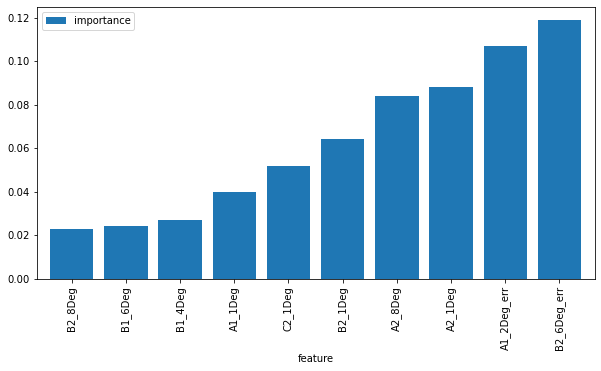

In [229]:
# Feature importance
classifier = xgb.XGBClassifier()
classifier.fit(x_train,y_train)

X_training = data.drop(['Label', 'Patient'], axis = 1).copy()
importances = pd.DataFrame({'feature':X_training.columns,'importance':np.round(classifier.feature_importances_,3)})
importances = importances.sort_values('importance').set_index('feature')
importances = importances[-11:-1]
importances.plot.bar(figsize=(10,5),width=0.8)
plt.plot()

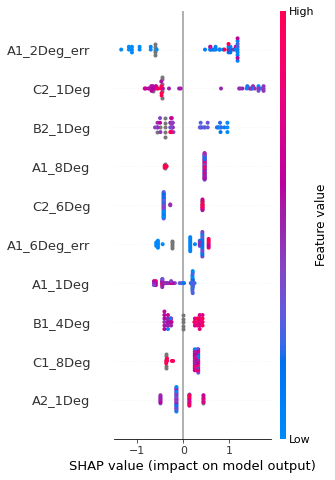

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib
classifier = xgb.XGBClassifier()
classifier.fit(x_train,y_train)
shap_values = shap.TreeExplainer(classifier).shap_values(x)
f = plt.figure()
shap.summary_plot(shap_values, x,max_display=10,show=False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 7)
#plt.savefig("summary_plot_with_.png", bbox_inches='tight', dpi=600)
plt.show()
plt.tight_layout()
#plt.savefig("shap_Gain_graph.png", format="png", dpi=300)

### Model with custom features

In [680]:
data = data[['Label','Patient','C2_6Deg','B2_4Deg','B2_6Deg','C2_4Deg',
            'C1_2Deg','C1_8Deg','A1_4Deg_err','C2_1Deg','B1_8Deg','B2_8Deg']]
def run_best_model(arg):
    # data set preparation
    # data = pd.read_csv('data.csv')
    data = arg

    ## Convert the categorical variables to number
    LabelEncoder_gender = LabelEncoder()
    data['Label'] = LabelEncoder_gender.fit_transform(data['Label'])
    
    # run 30 repetitions
    splits = 50
    all_set = []
    for split in range(1,splits+1):
        
        seed = split

        # data set preparation
        train , test = train_test_split(data,train_size = 0.7,shuffle=True,random_state=seed)
        #validate , test = train_test_split(rest, train_size = 0.5, shuffle=True)

        # training set
        data_tra_x = train.iloc[:,2:].values
        data_tra_y = train.iloc[:,0].values


        # validation set
        # data_val_x = validate.iloc[:,2:].values
        # data_val_y = validate.iloc[:,0].values


        # test set
        data_tes_x = test.iloc[:,2:].values
        data_tes_y =  test.iloc[:,0].values

        best_model = xgb.XGBClassifier(n_estimators=n_estimators_ls[best_hyperparams['n_estimators']],
                               max_depth=max_depth_ls[best_hyperparams['max_depth']],
                               min_child_weight=min_child_weight_ls[best_hyperparams['min_child_weight']],
                               learning_rate=best_hyperparams['learning_rate'],
                               gamma=best_hyperparams['gamma'],
                               subsample=best_hyperparams['subsample'],
                               colsample_bytree=best_hyperparams['colsample_bytree'],
                               n_jobs=6, random_state=1, seed=1,use_label_encoder=False)
    
        best_model.fit(data_tra_x,data_tra_y,eval_metric='auc')

        # training error
        tra_pred = best_model.predict_proba(data_tra_x)
        tra_results = [split,'tra',roc_auc_score(data_tra_y,tra_pred[:,1])]
      

        # validation error
        # val_pred = best_model.predict_proba(data_val_x)
        # val_results = [split,'val',roc_auc_score(data_val_y,val_pred[:,1])]
        

        # testing error
        tes_pred = best_model.predict_proba(data_tes_x)
        tes_results = [' ','tes',roc_auc_score(data_tes_y,tes_pred[:,1])]
    

        all_set += tra_results,tes_results

    all_set_df = pd.DataFrame(all_set,columns=['split','set','acc'])

    print('train accuracy',all_set_df[all_set_df['set'] == 'tra']['acc'].mean()),#'std',all_set_df[all_set_df['set'] == 'tra']['acc'].std())
    #print('validation accuracy',all_set_df[all_set_df['set'] == 'val']['acc'].mean(),'std',all_set_df[all_set_df['set'] == 'tra']['acc'].std())
    print('test accuracy',all_set_df[all_set_df['set'] == 'tes']['acc'].mean()),#'std',all_set_df[all_set_df['set'] == 'tes']['acc'].std())

#run_best_model(data)

In [681]:
run_best_model(data)

train accuracy 0.9661065254190254
test accuracy 0.7245714285714285


In [22]:
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
predictions = [round(value) for value in y_pred]

# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.00%


In [23]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.79      0.88        14

    accuracy                           0.80        15
   macro avg       0.62      0.89      0.64        15
weighted avg       0.95      0.80      0.85        15



### Confusion Matrix

In [24]:
#confusion matrix
confusion = confusion_matrix(y_test,predictions)
print(confusion)

#  Sensitivity 
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # false negatives

sensitivity = TP/float(TP+FN)
print(sensitivity)

# Specificity
specificity = TN/float(TN+FP)
print(specificity)


auc_score = roc_auc_score(y_test,predictions)
fpr , tpr , thresholds = roc_curve (y_test, predictions)
print(auc_score)

[[ 1  3]
 [ 0 11]]
1.0
0.25
0.625


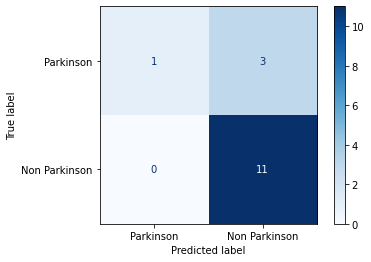

In [25]:
class_names = ['Parkinson','Non Parkinson']
disp = plot_confusion_matrix(best_model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

#plt.savefig('cm.png',dpi=300)
plt.show()


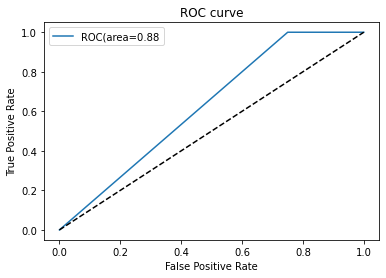

In [26]:
def plot_roc_curve(fpr,tpr): 
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  plt.plot(fpr,tpr,label='ROC(area=0.88')
  plt.plot(p_fpr, p_tpr,'--',color='black') 
  plt.axis([-0.05,1.05,-0.05,1.05]) 
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.legend()
  plt.savefig('roc_curve.png',dpi=300)
  plt.show()    
  
plot_roc_curve (fpr,tpr)
#plt.savefig('roc.png',dpi=300)

In [14]:
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

In [62]:
x = data.iloc[:,2:].values
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
y = data.iloc[:,0].values

In [17]:
#model = xgb.XGBClassifier()
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, valid_scores = learning_curve(
    best_model, x, y, train_sizes=train_sizes, cv=5,scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

[12:26:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:58] WARNING: /Users/runner/miniforge3/cond

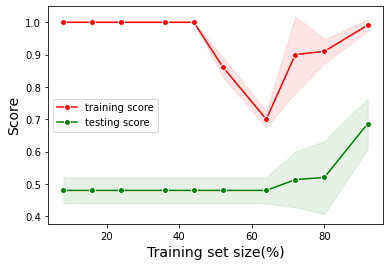

In [18]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

valid_scores_mean = valid_scores.mean(axis = 1)
valid_scores_std = valid_scores.std(axis=1)
fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores_mean,"o-",markeredgecolor='white', label = 'training score',color='r')
ax.fill_between(train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
ax.plot(train_sizes, valid_scores_mean, "o-",markeredgecolor='w', label = 'testing score',color='g')
ax.fill_between(train_sizes,
        valid_scores_mean - valid_scores_std,
        valid_scores_mean + valid_scores_std,
        alpha=0.1,
        color="g",
    )
#ax.set_xticks([0,331,662,993,1324,1656])
ax.set_xticklabels([0,20,40,60,80,100,])
ax.set_ylabel('Score', fontsize = 14)
ax.set_xlabel('Training set size(%)', fontsize = 14)
#ax.set_title('Learning curve for a RF model', fontsize = 14, y = 1.03)
ax.legend()
#
plt.show()

In [67]:
# x = data.iloc[:,2:]
# sc_x = StandardScaler()
# x = sc_x.fit_transform(x)
# y = data.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2)
model = xgb.XGBClassifier()
model.fit(X_train, Y_train)

[11:24:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

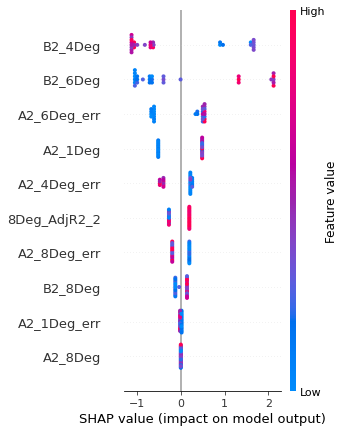

In [71]:
# x = data.iloc[:,2:]
# # sc_x = StandardScaler()
# # x = sc_x.fit_transform(x)
# y = data.iloc[:,0]
# X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2)
# model = xgb.XGBClassifier()
# model.fit(X_train, Y_train)
import matplotlib
shap_values = shap.TreeExplainer(classifier).shap_values(x)
f = plt.figure()
shap.summary_plot(shap_values, x,max_display=10,show=False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 7)
plt.savefig("summary_plot_with_.png", bbox_inches='tight', dpi=600)
plt.show()

In [52]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x)
shap.force_plot(explainer.expected_value, shap_values[0, :], x.iloc[0, :])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

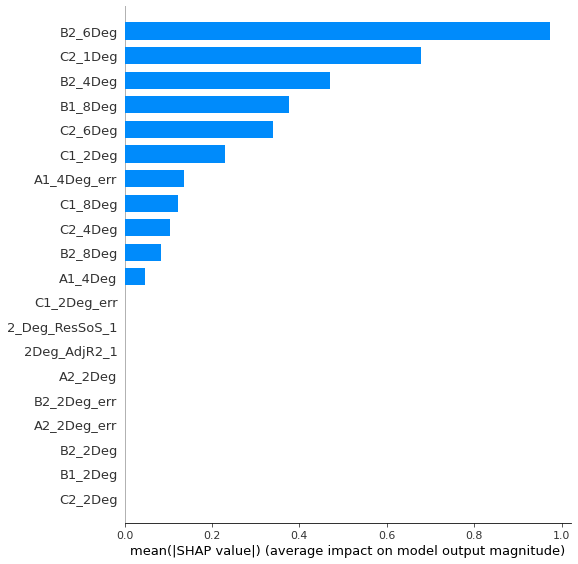

In [355]:
X_importance = x_test
# model = xgb.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
# model.fit(x_train, y_train)
# Explain model predictions using shap library:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_importance)

feature_names=['B2_6deg','C2_1Deg','B2_4Deg','B1_8Deg','C2_6Deg','C1_2_Deg','A1_4Deg_err',
                                                'C1_8Deg','C2_4Deg','B2_8Deg','A1_4Deg'] 
# # Plot summary_plot as barplot:
# feature_indices = [X_importance[:,:].index.tolist().index(x) for x in feature_names]
# shap.summary_plot(shap_values[1][:,feature_indices], X_importance[:, feature_indices])
shap.summary_plot(shap_values[0:10], X_importance[0:10], plot_type='bar')

Text(0, 0.5, 'Features')

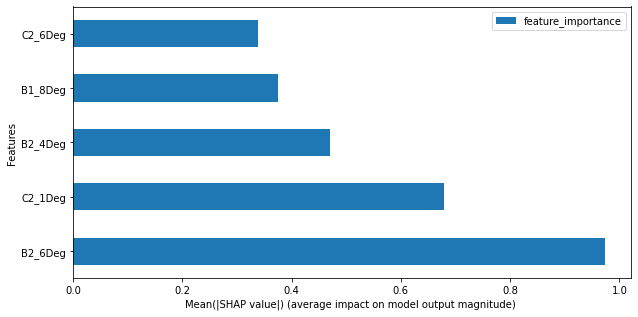

In [257]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_train.columns,vals)),columns=['col_name','feature_importance'])
feature_importance.sort_values(by=['feature_importance'],ascending=False,inplace=True)
feature_importance[0:5]
importances = feature_importance.sort_values('feature_importance',ascending=False).set_index('col_name')
importances = importances[0:5]
importances.plot.barh(figsize=(10,5))
plt.xlabel('Mean(|SHAP value|) (average impact on model output magnitude) ')
plt.ylabel('Features')

In [277]:
feature_importance[0:10]

,col_name,feature_importance
58,B2_6Deg,0.972769
12,C2_1Deg,0.679353
42,B2_4Deg,0.469844
66,B1_8Deg,0.375782
60,C2_6Deg,0.339261
20,C1_2Deg,0.229066
33,A1_4Deg_err,0.135572
68,C1_8Deg,0.121457
44,C2_4Deg,0.105079
74,B2_8Deg,0.083461


In [286]:
shap.plots.beeswarm(shap_values)

UnboundLocalError: local variable 'values' referenced before assignment

IndexError: index 25 is out of bounds for axis 0 with size 20

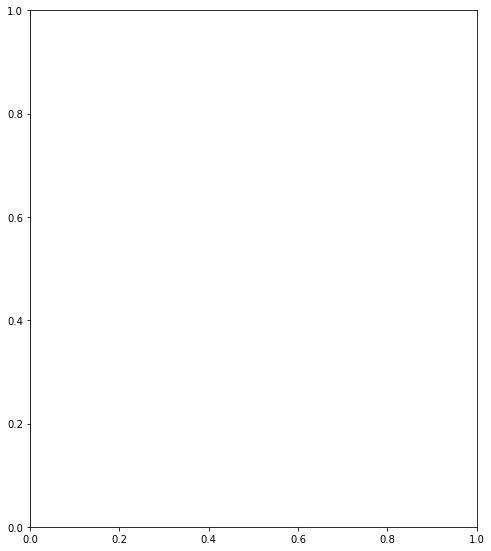

In [309]:
shap.summary_plot(shap_values, x_train)

In [280]:
train_X.iloc[0,:]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [46]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], train_X.iloc[0,:])
#plt.savefig("shap.png", format='png', dpi=600)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [281]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

import shap
print(shap.__version__)

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#model = RandomForestClassifier(max_depth=5, n_estimators=100).fit(X, y)
explainer = TreeExplainer(model)
sv = explainer(x)
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=x.values, 
                  feature_names=x.columns)
idx = 0
waterfall(exp[idx])

0.40.0


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

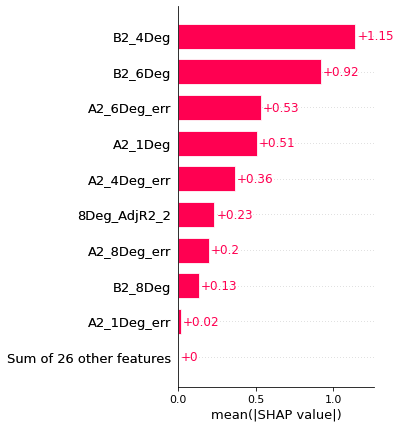

In [70]:
# y = LabelEncoder_gender.fit_transform(y)
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
#         test_size = 0.2, random_state = 1234)
# xgb_model = xgb.XGBRegressor(random_state=42)
# xgb_model.fit(X_train, Y_train)

#
# The SHAP Values
import shap
explainer = shap.Explainer(classifier)
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=10,show=False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 7)
plt.savefig("shap_average_1.png", format='png', dpi=600,bbox_inches='tight')
plt.show()

In [343]:
class_names = ["Not_Parkinson's","Parkinson's"]
# compute SHAP values
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values[0:1],x.values, plot_type="bar",max_display=10,class_names=class_names,feature_names=x.columns)
#plt.savefig("shap_mean.png", format='png', dpi=600,bbox_inches='tight')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [267]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0:], x.iloc[0:], feature_names = x.columns)

# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

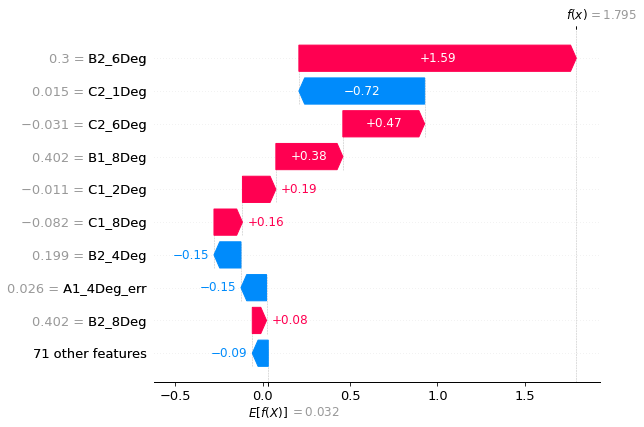

<Figure size 432x288 with 0 Axes>

In [198]:
shap.plots.waterfall(shap_values[1])
plt.savefig("water_fall[1].png", format='png', dpi=600)

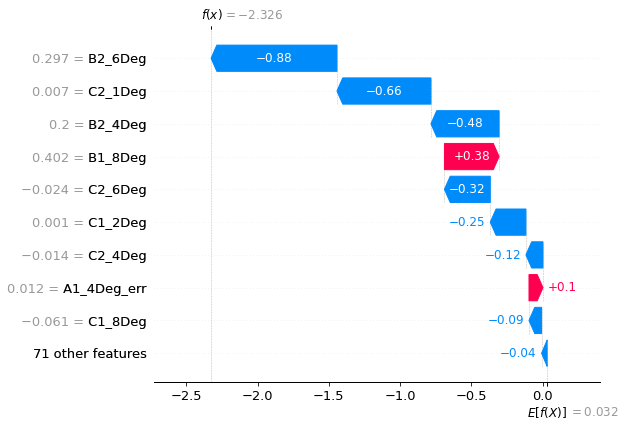

<Figure size 432x288 with 0 Axes>

In [189]:
shap.plots.waterfall(shap_values[0])
plt.savefig("water_fall[0].png", format='png', dpi=600)

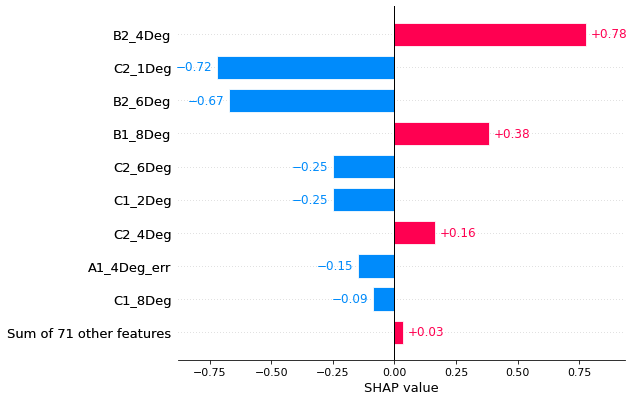

In [230]:
shap.plots.bar(shap_values[8])

In [220]:
shap.plots.bar(shap_values[18])
plt.savefig("shap_bar[1].png", format='png', dpi=600,bbox_inches='tight')
plt.show()

IndexError: index 18 is out of bounds for axis 0 with size 9

In [163]:
explainer = shap.Explainer(classifier)
shap_values = explainer(x_test)
shap.plots.waterfall(shap_values[1],matplotlib = True, show = False)
plt.savefig("water_fall_[1].png", format='png', dpi=600,bbox_inches='tight')

NameError: name 'plt' is not defined

In [209]:
import matplotlib.pyplot as plt
explainer = shap.Explainer(classifier)
shap_values = explainer(x_test)
p = shap.plots.waterfall(shap_values[0],show=False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 7)
plt.savefig("water_fall_[0].png", format='png', dpi=600,bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

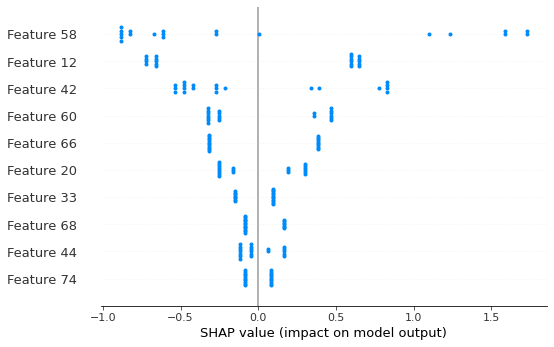

In [382]:
shap.summary_plot(shap_values, max_display=10)
#plt.savefig("shap_value.png", format='png', dpi=600,bbox_inches='tight')


In [310]:
shap.plots.heatmap(shap_values)
#plt.savefig("heat_map.png", format='png', dpi=600)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

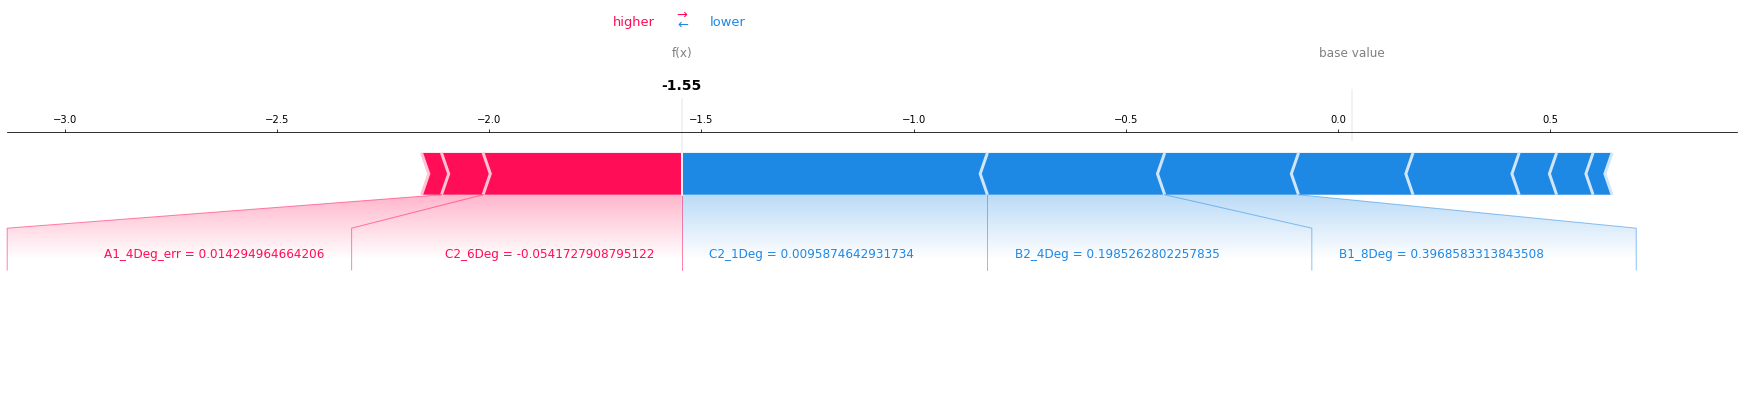

In [494]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation 
#shap.initjs()
import matplotlib
p =shap.force_plot(explainer.expected_value, shap_values[1,:], x_train.iloc[1,:],matplotlib = True, show = False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(31,5)
plt.savefig('shap[1].png',dpi=600,bbox_inches='tight')
plt.show()
# 
# fig.set_size_inches(3.5, 7)
# plt.show()
#shap.save_html("index.htm", f)

In [180]:
shap.initjs()
def p(j):
    explainer = shap.TreeExplainer(xgb_model)
    xgb_binary_shap_values = explainer.shap_values(X_train)
    return(shap.force_plot(explainer.expected_value, xgb_binary_shap_values[j,:], X_train.iloc[j,:], link='logit'))
p(0)
#plt.savefig("new.png", format='png', dpi=600)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [1]:
import matplotlib
matplotlib.__version__

'3.4.3'

[0]	validation_0-error:0.13043	validation_0-logloss:0.66678	validation_1-error:0.50000	validation_1-logloss:0.68942
[1]	validation_0-error:0.13043	validation_0-logloss:0.64268	validation_1-error:0.50000	validation_1-logloss:0.68701
[2]	validation_0-error:0.13043	validation_0-logloss:0.62061	validation_1-error:0.50000	validation_1-logloss:0.68577
[3]	validation_0-error:0.13043	validation_0-logloss:0.59444	validation_1-error:0.50000	validation_1-logloss:0.66231
[4]	validation_0-error:0.13043	validation_0-logloss:0.57527	validation_1-error:0.50000	validation_1-logloss:0.66252
[5]	validation_0-error:0.04348	validation_0-logloss:0.55219	validation_1-error:0.33333	validation_1-logloss:0.64174
[6]	validation_0-error:0.04348	validation_0-logloss:0.53531	validation_1-error:0.33333	validation_1-logloss:0.63895
[7]	validation_0-error:0.04348	validation_0-logloss:0.51494	validation_1-error:0.33333	validation_1-logloss:0.62055
[8]	validation_0-error:0.04348	validation_0-logloss:0.49615	validation_1

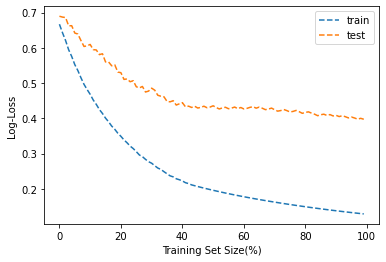

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)
# define the model
model = xgb.XGBClassifier(eta=0.066)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric=["error",'logloss'], eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train',ls='--')
plt.plot(results['validation_1']['logloss'], label='test',ls='--')
plt.xlabel('Training Set Size(%)')
plt.ylabel('Log-Loss')
# show the legend
plt.legend()
# show the plot

plt.savefig("loss.png", format='png', dpi=600)
plt.show()

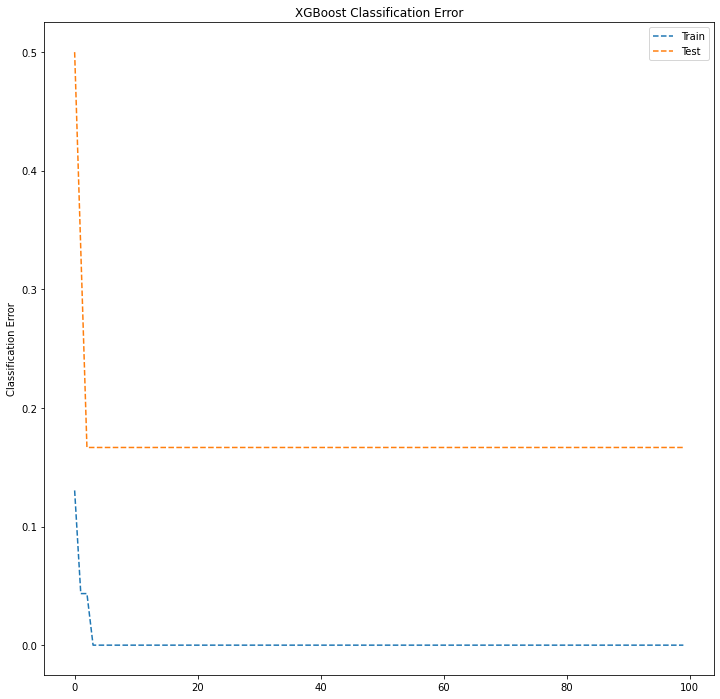

In [437]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(results['validation_0']['error'], label='Train',ls='--')
ax.plot(results['validation_1']['error'], label='Test',ls='--')
ax.legend()

plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [506]:
model = xgb.XGBClassifier(objective= 'binary:logistic')

[0]	validation_0-logloss:0.65821	validation_0-auc:0.76587	validation_0-error:0.26087	validation_1-logloss:0.68974	validation_1-auc:0.40000	validation_1-error:0.33333
[1]	validation_0-logloss:0.61848	validation_0-auc:0.90476	validation_0-error:0.13043	validation_1-logloss:0.68843	validation_1-auc:0.70000	validation_1-error:0.33333
[2]	validation_0-logloss:0.58705	validation_0-auc:0.93651	validation_0-error:0.13043	validation_1-logloss:0.70033	validation_1-auc:0.80000	validation_1-error:0.33333
[3]	validation_0-logloss:0.55805	validation_0-auc:0.94841	validation_0-error:0.08696	validation_1-logloss:0.71229	validation_1-auc:0.80000	validation_1-error:0.50000
[4]	validation_0-logloss:0.54349	validation_0-auc:0.94841	validation_0-error:0.04348	validation_1-logloss:0.73417	validation_1-auc:0.80000	validation_1-error:0.50000
[5]	validation_0-logloss:0.51989	validation_0-auc:0.94841	validation_0-error:0.04348	validation_1-logloss:0.72812	validation_1-auc:0.80000	validation_1-error:0.50000
[6]	

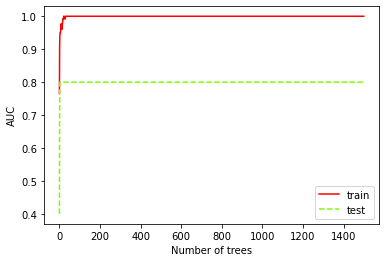

In [613]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)
# define the model
#best_model = xgb.XGBClassifier(objective= 'binary:logistic',eta=0.006,n_estimators=300)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
best_model.fit(X_train, y_train, eval_metric=['logloss','auc','error'], eval_set=evalset)
# evaluate performance
yhat = best_model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = best_model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['auc'], label='train',color='r')
plt.plot(results['validation_1']['auc'], label='test',color='lawngreen',ls='--')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
# show the legend
plt.legend()
# show the plot

#plt.savefig("auc.png", format='png', dpi=600)
plt.show()

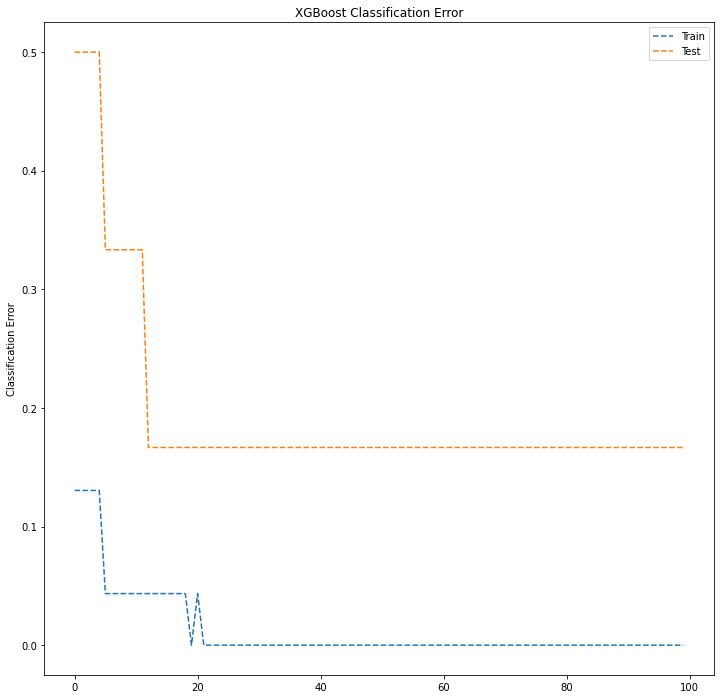

In [477]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(results['validation_0']['error'], label='Train',ls='--')
ax.plot(results['validation_1']['error'], label='Test',ls='--')
ax.legend()

plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

[0]	validation_0-logloss:0.67343	validation_1-logloss:0.69347
[1]	validation_0-logloss:0.65705	validation_1-logloss:0.69325
[2]	validation_0-logloss:0.64165	validation_1-logloss:0.69359
[3]	validation_0-logloss:0.62716	validation_1-logloss:0.69443
[4]	validation_0-logloss:0.61351	validation_1-logloss:0.69574
[5]	validation_0-logloss:0.60064	validation_1-logloss:0.69748
[6]	validation_0-logloss:0.58849	validation_1-logloss:0.69961
[7]	validation_0-logloss:0.57702	validation_1-logloss:0.70209
[8]	validation_0-logloss:0.56619	validation_1-logloss:0.70490
[9]	validation_0-logloss:0.55567	validation_1-logloss:0.70224
[10]	validation_0-logloss:0.54555	validation_1-logloss:0.69615
[11]	validation_0-logloss:0.53559	validation_1-logloss:0.69920
[12]	validation_0-logloss:0.52612	validation_1-logloss:0.69344
[13]	validation_0-logloss:0.51681	validation_1-logloss:0.69668
[14]	validation_0-logloss:0.50780	validation_1-logloss:0.69441
[15]	validation_0-logloss:0.49909	validation_1-logloss:0.69791
[1

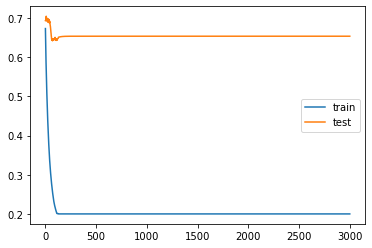

In [413]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=2)
# define the model
model = xgb.XGBClassifier(n_estimators=3000,eta=0.05)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()